In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma
import scipy.stats
from scipy import stats
np.random.seed(12345678)

In [128]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
salaries_by_region = pd.read_csv("salaries-by-region.csv")
salaries_by_college_type = pd.read_csv("salaries-by-college-type.csv")
degrees_that_pay_back = pd.read_csv("degrees-that-pay-back.csv")

salaries_by_region.update(salaries_by_region.iloc[:, 2:4].applymap(lambda x: float(x[1:].replace(',', ''))))

salary_in_floats = degrees_that_pay_back.iloc[:, [1,2,4,5,6,7]].applymap(lambda x: float(x[1:].replace(',', '')))
degrees_that_pay_back.update(salary_in_floats)

salaries_by_college_type.update(salaries_by_college_type.iloc[:, 2:4].applymap(lambda x: float(x[1:].replace(',', ''))))

salaries_by_college_type['Starting Median Salary'] = salaries_by_college_type['Starting Median Salary'].astype(float)
salaries_by_college_type['Mid-Career Median Salary'] = salaries_by_college_type['Mid-Career Median Salary'].astype(float)

# Overview of the data

There are three datasets given by WSJ "Where it Pays to Attend College?". 

* salaries by region
* salaries by college type
* degrees that pay back

All three datasets share the following columns

* starting median salary
* mid-career salaries for 10th, 25th, 50th, 75th, and 90th percentiles

## Duplicates

Before visualizing the data, let's first check to see if there are any duplicates of college in either college type or college region. 


In [16]:
crosslisted_schools = pd.concat(g for _, g in salaries_by_college_type.groupby("School Name") if len(g) > 1)
crosslisted_schools.head(6)

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
28,Arizona State University (ASU),Party,47400.0,84100.0,"$44,600.00","$60,700.00","$114,000.00","$163,000.00"
142,Arizona State University (ASU),State,47400.0,84100.0,"$44,600.00","$60,700.00","$114,000.00","$163,000.00"
38,Florida State University (FSU),Party,42100.0,73000.0,"$39,600.00","$52,800.00","$107,000.00","$156,000.00"
214,Florida State University (FSU),State,42100.0,73000.0,"$39,600.00","$52,800.00","$107,000.00","$156,000.00"
29,"Indiana University (IU), Bloomington",Party,46300.0,84000.0,"$43,600.00","$60,400.00","$119,000.00","$178,000.00"
144,"Indiana University (IU), Bloomington",State,46300.0,84000.0,"$43,600.00","$60,400.00","$119,000.00","$178,000.00"


From the data, we see that colleges in the college type dataset are duplicated between school type. Arizona State University is crosslisted between a party school but also a state school. What are the main school types that are crosslisted?

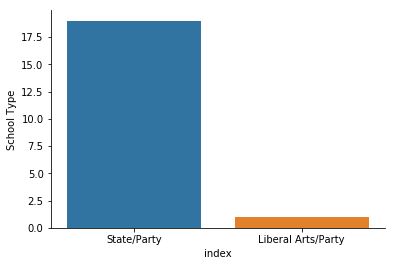

In [18]:
crosslisted_schools_counts = crosslisted_schools['School Type'].value_counts().to_frame().reset_index()
crosslisted_schools_counts = crosslisted_schools_counts.iloc[1:]

crosslisted_schools_counts.at[1, 'index'] = 'State/Party'
crosslisted_schools_counts.at[2, 'index'] = 'Liberal Arts/Party'

sns.barplot(data=crosslisted_schools_counts, x="index", y="School Type")
sns.despine()

## Missing Data

There are various amounts of missing values for different percentiles of mid-career salary. After analyzing each dataset for NaN's, here is the results of what we found.

In [31]:
salaries_by_college_type.isna().sum().to_frame().T

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,0,0,0,0,38,0,0,38


In [32]:
degrees_that_pay_back.isna().sum().to_frame().T

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,0,0,0,0,0,0,0,0


In [33]:
salaries_by_region.isna().sum().to_frame().T

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,0,0,0,0,47,0,0,47


The analysis shows that we are only missing data from the 10th and 90th percentiles. There are no missing data from the degrees that pay back dataset.

# Distribution of Starting and Mid-career salaries

What are the resulting distributions for starting and mid-career salaries by college?

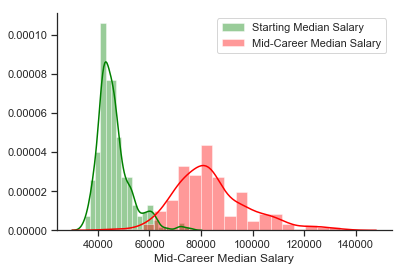

In [120]:
figure1 = sns.distplot(salaries_by_college_type[('Starting Median Salary')], bins=20, color='green', \
             label='Starting Median Salary')

sns.distplot(salaries_by_college_type[('Mid-Career Median Salary')], bins=20, color='red', \
             label='Mid-Career Median Salary')
plt.legend()
sns.despine()

In [39]:
salaries_by_college_type['Starting Median Salary'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Starting Median Salary,269.0,46068.401487,6412.616242,34800.0,42000.0,44700.0,48300.0,75500.0


In [40]:
salaries_by_college_type['Mid-Career Median Salary'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Mid-Career Median Salary,269.0,83932.342007,14336.191107,43900.0,74000.0,81600.0,92200.0,134000.0


From the graph, starting median salary is certainly skewed right, with most of the salaries occuring within the 40000 range while a small fraction of college command a starting salary between 60000 and 80000. The mean median starting salary is actually 46k while the max median salary is 75k.

However by mid-career, the median salary goes toward a normal distribution with the mean mid-career median salary 83k and the max 134k. 

# Is there any correlation between starting and mid career salaries

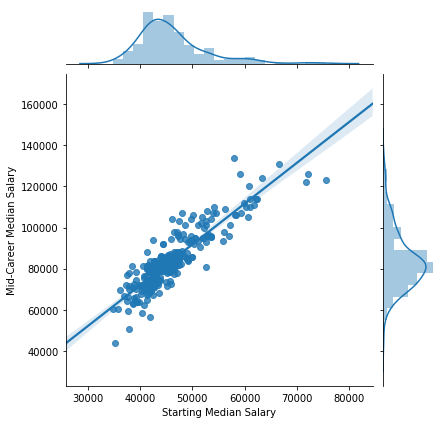

In [676]:
g = sns.jointplot(x="Starting Median Salary", y="Mid-Career Median Salary", \
                      data=salaries_by_college_type, kind="reg")


In [679]:
stats.pearsonr(salaries_by_college_type['Starting Median Salary'], \
               salaries_by_college_type['Mid-Career Median Salary'])

(0.8896979017098641, 6.636327483579059e-93)

The Pearson correlation coefficient is 0.889 which says that there is a very strong correlation between starting salary and mid-career salary. From a logical real world point of view, if you start out having a decently high salary, you will want to climb the ladder and get an even higher salary mid career

# Salaries by Major

How do salaries differ by degree? Which majors show the highest starting median salary and mid-career median salary?

In [42]:
degrees_that_pay_back_sorted = degrees_that_pay_back.sort_values("Starting Median Salary", ascending=False)

In [43]:
median_salary = degrees_that_pay_back[['Undergraduate Major', 'Mid-Career Median Salary']].sort_values("Mid-Career Median Salary", ascending=False)

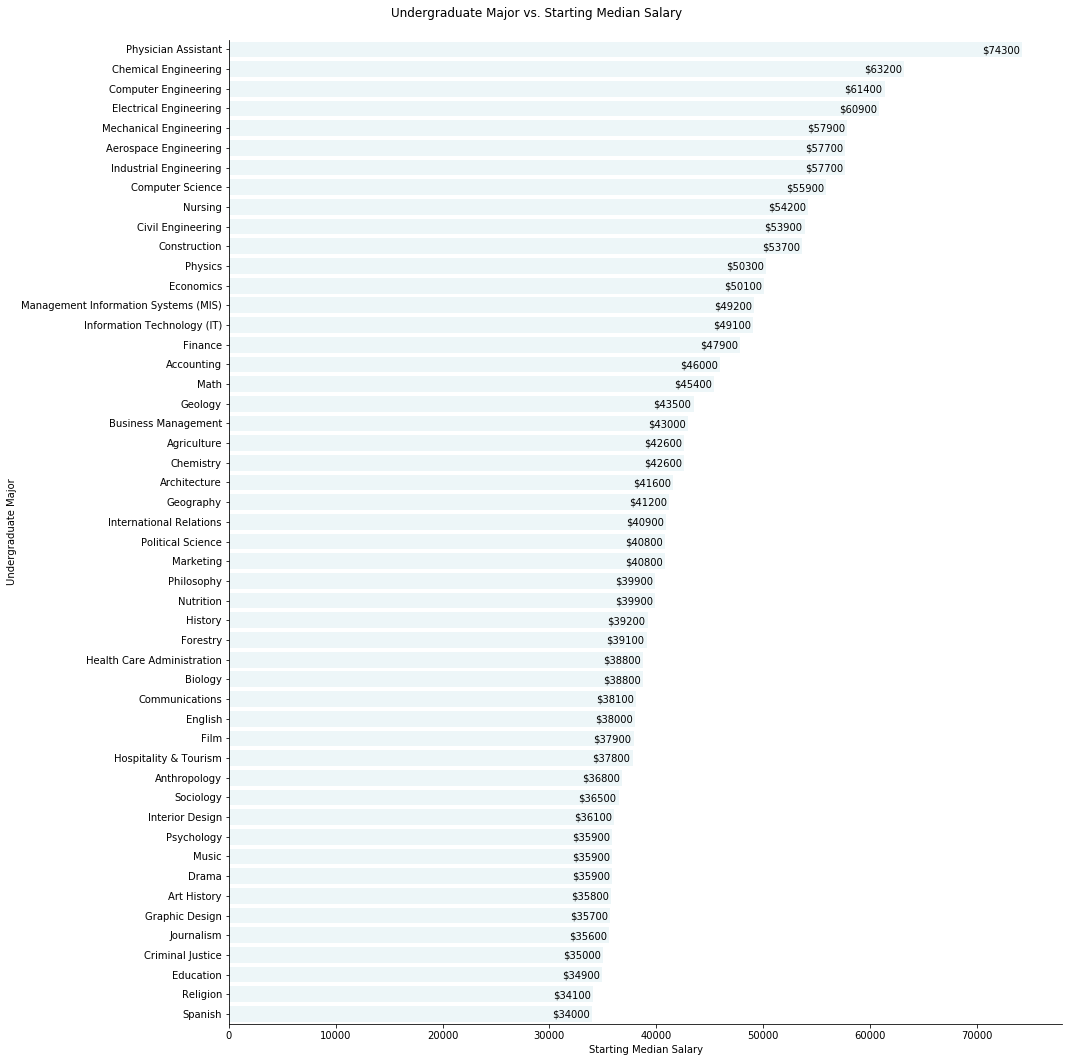

In [64]:
plot = sns.catplot(data=degrees_that_pay_back_sorted, y="Undergraduate Major", x="Starting Median Salary", 
                   aspect = 1, height = 15, kind='bar', \
                   palette=sns.light_palette((210, 90, 60), input="husl", n_colors=1),
                   )

plot.despine()
plot.set_xticklabels(size='medium', weight='ultralight', family='sans-serif')
plt.subplots_adjust(top=0.95)
plot.fig.suptitle('Undergraduate Major vs. Starting Median Salary')

for p in plot.ax.patches:
    width = p.get_width()
    plt.text(p.get_width() - 200, p.get_y()+0.55*p.get_height(),
             '${:1.0f}'.format(width),
             ha='right', va='center')


The majors with highest starting median salary are

* Physician Assistant
* Chemical Engineering
* Computer Engineering
* Electrical Engineering
* Mechanical Engineer

The bottom five majors with lowest starting salary are

* Spanish
* Religion
* Education
* Criminal Justice
* Journalism

Physicians assistant is at the top? Coming from a school like UC Berkeley with starting Computer Science graduates scooped up by the prominent tech companies in the area making 6 figures starting out, I found P.A at the top and Computer Science not even making the top 5 hard to believe. But after recognizing my own biases, especially anecdotal bias and confirmation bias, I am at peace with the results. Let's wait and see the results for mid-career salary.

Text(0.5, 0.98, 'Undergraduate Major vs. Starting Median and Mid-Career Salary')

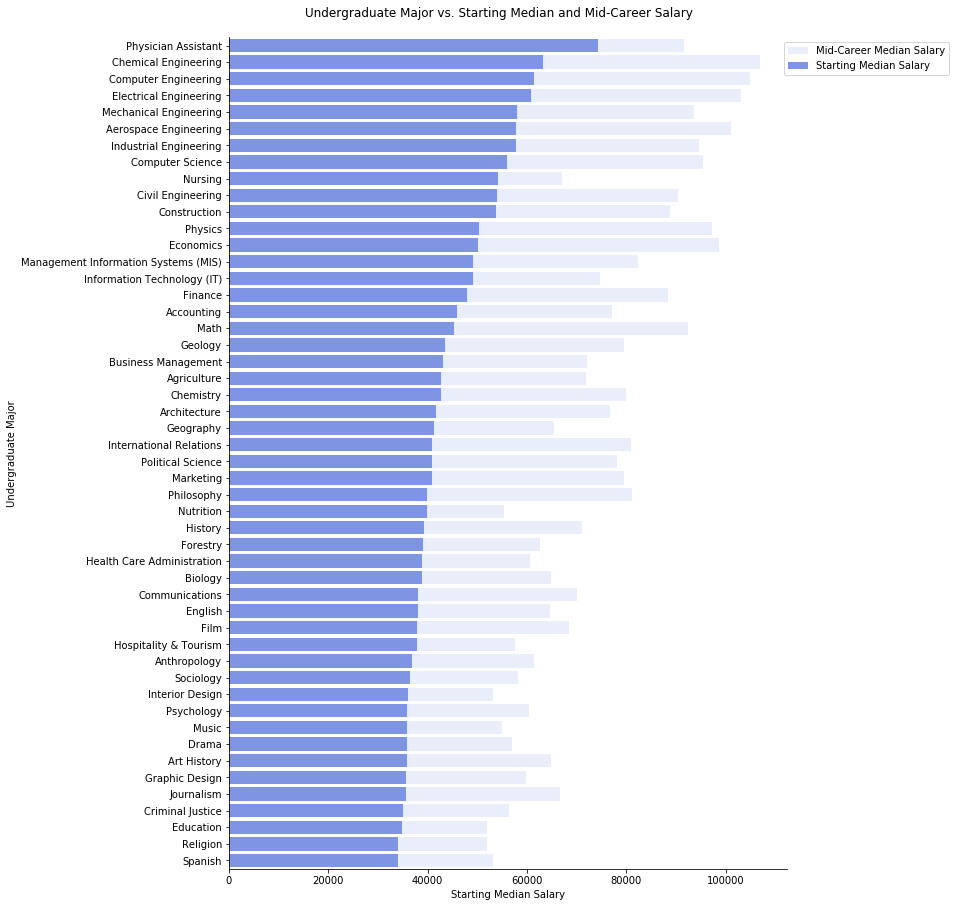

In [90]:
figure, ax = plt.subplots(nrows=1, figsize=(10, 14))

plot1 = sns.barplot(data=degrees_that_pay_back_sorted, y="Undergraduate Major", x="Mid-Career Median Salary", \
            palette=sns.light_palette((260, 90, 60), input="husl", n_colors=1),
            label='Mid-Career Median Salary')

sns.barplot(data=degrees_that_pay_back_sorted, y="Undergraduate Major", x="Starting Median Salary", \
                   palette=sns.light_palette((260, 90, 60), input="husl", n_colors=1, reverse=True),
           label='Starting Median Salary',
           ax=plot1)

leg = plt.legend(loc=1)
sns.despine()

bb = leg.get_bbox_to_anchor().inverse_transformed(plot1.transAxes)
xOffset = 0.3
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = plot1.transAxes)

plt.subplots_adjust(top=0.95)
figure.suptitle('Undergraduate Major vs. Starting Median and Mid-Career Salary')


# for p in ax.patches:
#     width = p.get_width()
#     plt.text(p.get_width() - 1000, p.get_y()+0.55 * p.get_height(),
#              '${:1.0f}'.format(width), ha='right', va='center')


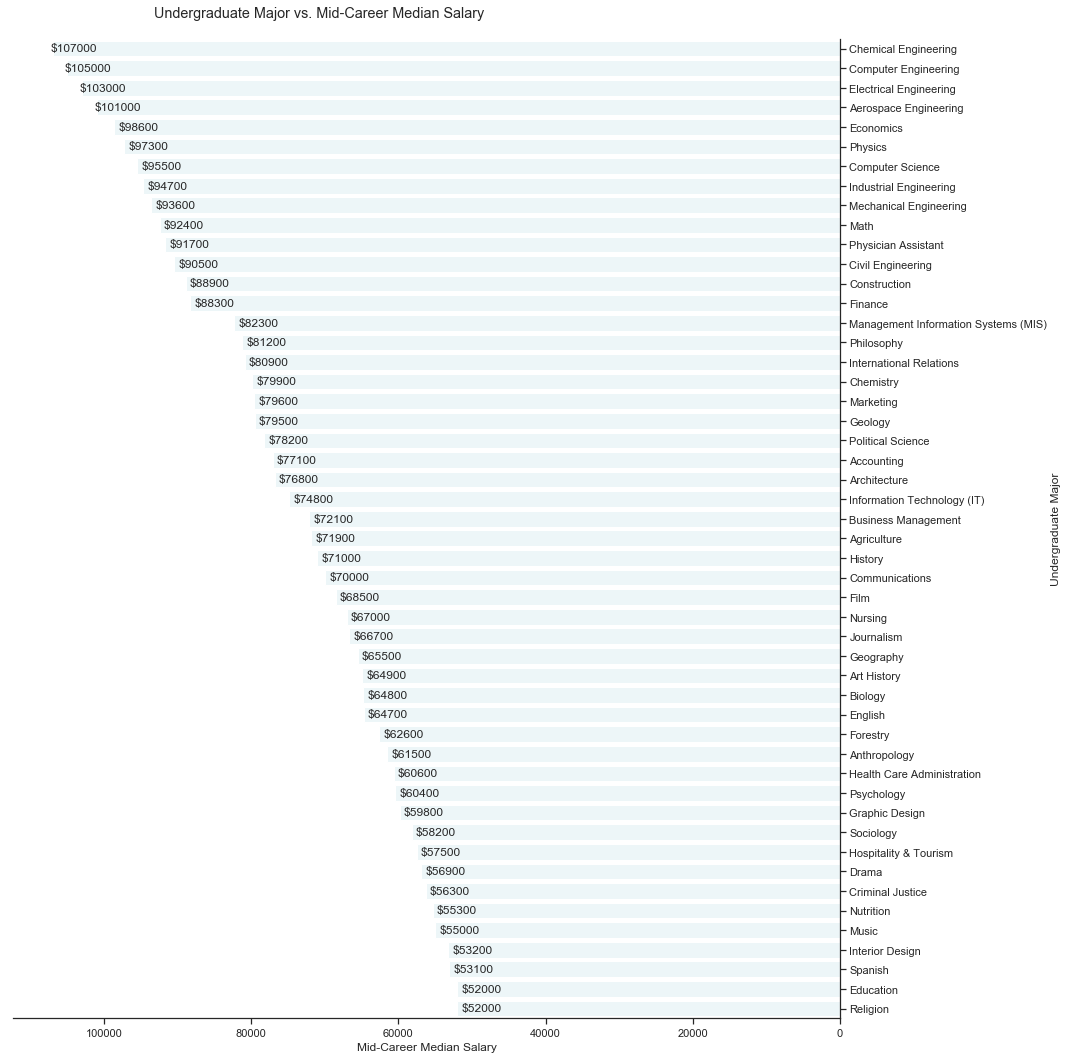

In [101]:
plot1 = sns.catplot(data=median_salary, y="Undergraduate Major", x="Mid-Career Median Salary", 
                   aspect = 1, height = 15, kind='bar', palette=sns.light_palette((210, 90, 60), input="husl", n_colors=1)
                   )

plot1.fig.axes[0].invert_xaxis()
plt.subplots_adjust(top=0.95)

sns.despine(offset=0, left=True, right=False)
plot1.ax.yaxis.tick_right()
plot1.ax.yaxis.set_label_position("right")

plot1.fig.suptitle('Undergraduate Major vs. Mid-Career Median Salary')

for p in plot1.ax.patches:
    width = p.get_width()
    plt.text(p.get_width() - 6000, p.get_y()+0.50*p.get_height(),
             '${:1.0f}'.format(width),
             ha='right', va='center')

The majors with highest mid-career median salary are

* Chemical Engineering
* Computer Engineering
* Electrical Engineering
* Aerospace Engineer
* Economics

The bottom five majors with lowest mid-career salary are

* Music
* Interior Design
* Spanish
* Education
* Religion

It comes as no surprise to me that Physician Assistant fails to make the top 5. It has instead fallen to 11th place. The top five majors with highest mid-career median salary are between four engineering majors and econ. Engineering dominates regardless of starting or mid career median salary.

# Which degrees show the most growth in salary from starting to mid-career?


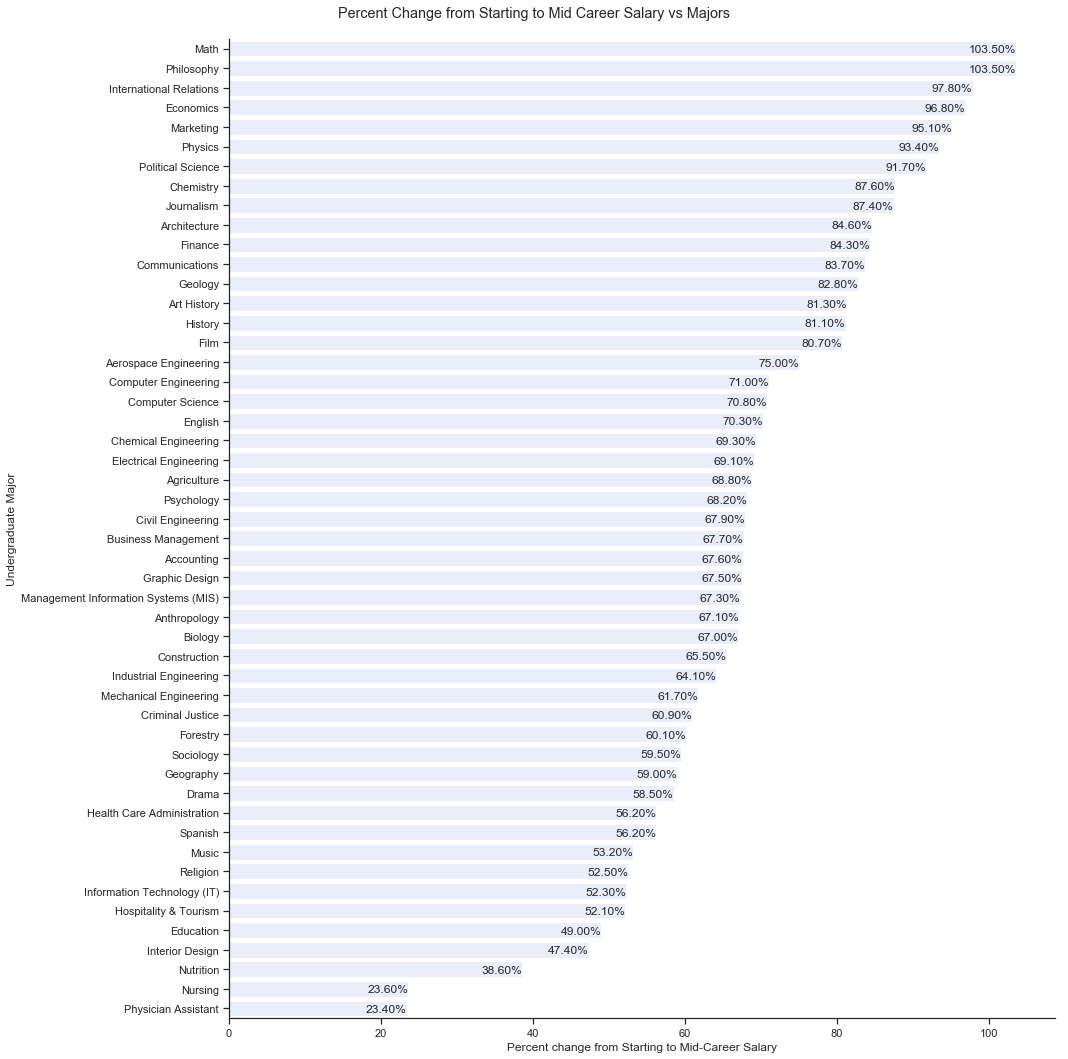

In [102]:
percent_change_df = degrees_that_pay_back[['Undergraduate Major', 'Percent change from Starting to Mid-Career Salary']].sort_values("Percent change from Starting to Mid-Career Salary", ascending=False)

plot2 = sns.catplot(data=percent_change_df, y="Undergraduate Major", x="Percent change from Starting to Mid-Career Salary", 
                   aspect = 1, height = 15, kind='bar', palette=sns.light_palette((260, 90, 60), input="husl", n_colors=1)
                   )

plt.subplots_adjust(top=0.95)
plot2.fig.suptitle('Percent Change from Starting to Mid Career Salary vs Majors')

for p in plot2.ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='right', va='center')

The top five majors with the largest percent change are

* Math
* Philosophy
* International Relations
* Economics
* Marketing

It's interesting to note that Physician Assistant shows the least growth between starting and mid-career salary. Although it has the highest starting median salary, over the course of a career it has the least potential for further career growth.

The United States is dominated by capitalism, so it makes sense that all the careers show positive growth. However in the future with a bunch of careers being automated, we could see negative percent change between starting and mid-career salaries. 

Unfortunately, we have only looked at medians for both starting and mid-career salaries. There could be a huge difference between the cream of the crop and the rest.

# How do the top 90th percentiles rank according to major?

In [103]:
ninty_percentile_sorted = degrees_that_pay_back.sort_values(by='Mid-Career 90th Percentile Salary', ascending=False)

degrees_melted = pd.melt(ninty_percentile_sorted, value_vars=['Starting Median Salary', 'Mid-Career Median Salary', \
                                           'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', \
                                           'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary'], \
                        id_vars='Undergraduate Major')

Text(0.5, 0.98, 'College Majors Ranked by Mid-Career Salary (Highest 90th Percentile)')

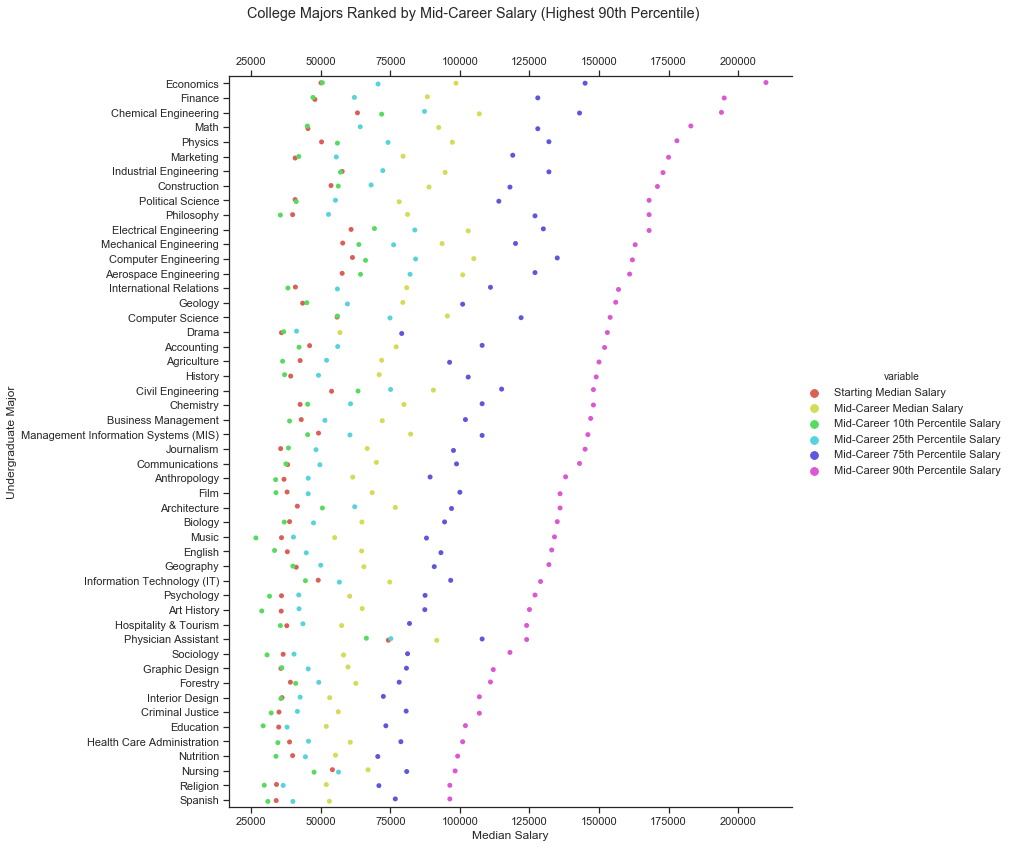

In [117]:
plot10 = sns.catplot(data=degrees_melted, y='Undergraduate Major', x='value', hue='variable', height=12, \
                     palette=sns.color_palette("hls", n_colors=6))
plt.subplots_adjust(top=0.90)
sns.despine(offset=0, right=True, top=False)
plot10.ax.tick_params(bottom=True, top=True)
plot10.ax.set_xlabel('Median Salary')    
# plot10.ax.xaxis.set_label_position('top') 
plot10.ax.tick_params(labelbottom=True,labeltop=True)
plot10.fig.suptitle('College Majors Ranked by Mid-Career Salary (Highest 90th Percentile)')

The 90th percentile tells us that certain majors have a lot of salary potential. The five 90th perentile majors are

* Economics
* Finance
* Chemical Engineering
* Math
* Physics

There are some majors like Spanish and Religions that the 90th percentile doesn't even exceed the 100k mark. This is useful information for prospective college students when deciding a major. If you want a certain lifestyle and aspire to make X amount of money, choosing the right major makes a huge difference.

# Salaries by College Type

In [112]:
school_type_hist = pd.DataFrame(salaries_by_college_type['School Type'].value_counts()).reset_index()

In [113]:
school_type_hist

,index,School Type
0,State,175
1,Liberal Arts,47
2,Party,20
3,Engineering,19
4,Ivy League,8


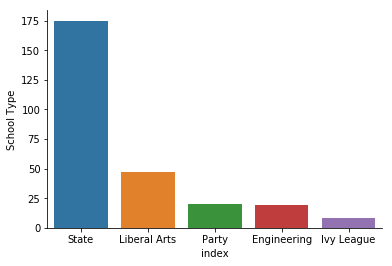

In [255]:
sns.barplot(data=df, x="index", y="School Type")
sns.despine()

This is the distribution of the types of schools from the "salaries_by_college_type.csv." As you can see, the dataset has much more state schools than other types of schools. This sample accurately reflects the status of American education. There are more state schools than Engineering schools currently in the USA.

In [244]:
crosslisted_schools = pd.concat(g for _, g in salaries_by_college_type.groupby("School Name") if len(g) > 1)

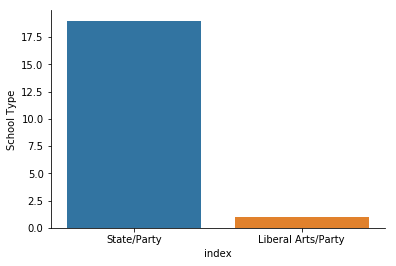

In [260]:
crosslisted_schools_counts = crosslisted_schools['School Type'].value_counts().to_frame().reset_index()
crosslisted_schools_counts = crosslisted_schools_counts.iloc[1:]

crosslisted_schools_counts.at[1, 'index'] = 'State/Party'
crosslisted_schools_counts.at[2, 'index'] = 'Liberal Arts/Party'

sns.barplot(data=crosslisted_schools_counts, x="index", y="School Type")
sns.despine()

From the beginning analysis, we have that certain schools are crosslisted. Compared to the distribution of all party schools, the graph tells us that most party schools are also state schools. 

Some college have multiple types. In this particular dataframe we have 19 state and party schools and one school crosslisted as liberal arts and party school.

# What is the relationship between starting and mid-career salary by school type?

In [122]:
school_type_salaries = salaries_by_college_type.groupby('School Type')['Starting Median Salary', 'Mid-Career Median Salary']

In [114]:
salary_college_type = salaries_by_college_type[['School Name', 'Starting Median Salary', 'Mid-Career Median Salary', 'School Type']]

college_type_sorted = salary_college_type.sort_values(by='Mid-Career Median Salary', ascending=False)
salary_college_type_melted = pd.melt(frame=college_type_sorted,
                                     id_vars=['School Type'],
                         value_vars=['Starting Median Salary', 'Mid-Career Median Salary']
                         )

In [115]:
salary_college_type_melted['value'] = salary_college_type_melted['value'].astype(float)

Text(0.5, 0.98, 'Relationship between School Type and Salary')

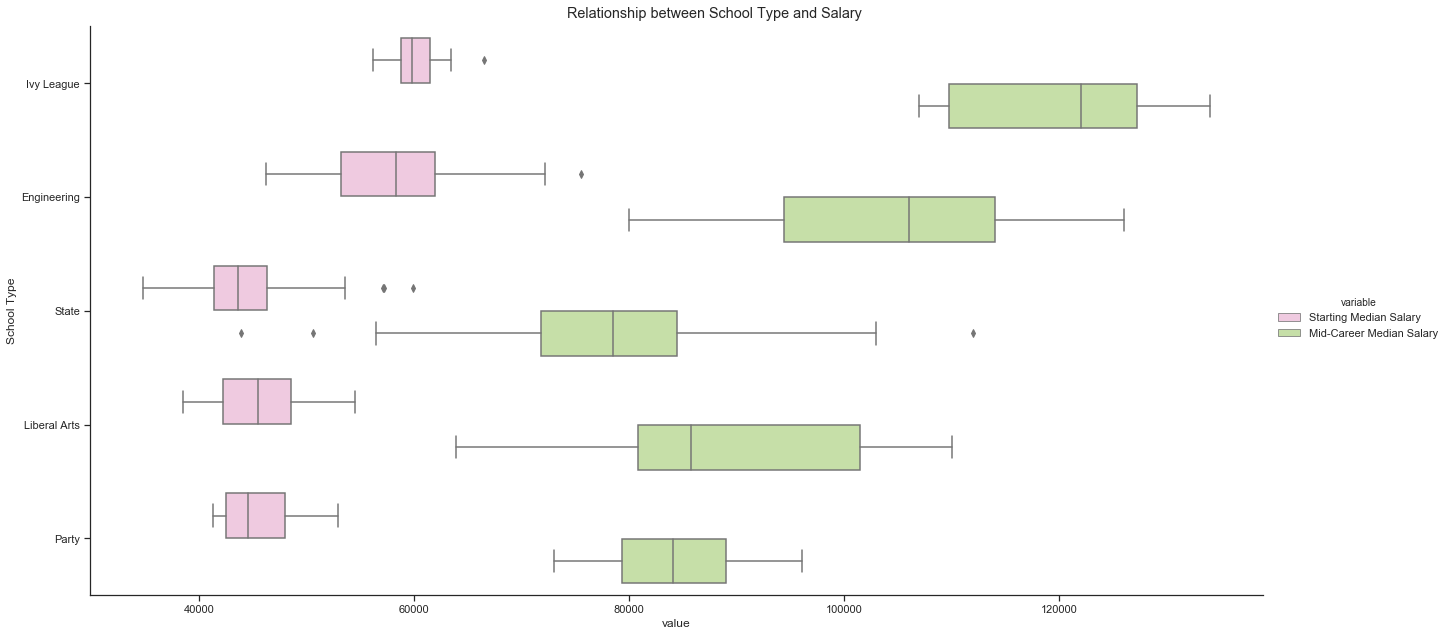

In [199]:
fig10 = sns.catplot(data=salary_college_type_melted, x="value", y="School Type", hue="variable", \
            kind="box", aspect=2, height=9, palette=sns.color_palette("PiYG", n_colors=2), dodge=True)
plt.subplots_adjust(top=0.95)
# fig10.ax.set_aspect()
fig10.fig.suptitle('Relationship between School Type and Salary')

Going to a Ivy league or engineering school leads to higher starting median career salaries and higher mid-career median salaries. 

Looking at the other box plots, we see much more similar characteristics. State, liberal arts, and party schools both have the same distribution of starting median salaries. Mid Career salaries show more of a stretch between these three types of schools but let's analyze. 

But what I'm curious about is the difference between a state scool that is a party school and a state school that is a liberal arts school. What would the differences between these two be?

# Should you go to a state school that is a party school?

In [144]:
party = salaries_by_college_type.groupby('School Type').get_group('Party')
state = salaries_by_college_type.groupby('School Type').get_group('State')

In [145]:
party_and_state = pd.concat([party, state])
party_and_state_to_plot = party_and_state.iloc[:, 0:4]

In [147]:
party_schools = party_and_state_to_plot[party_and_state_to_plot['School Type'] == 'Party']
not_party_schools = party_and_state_to_plot[party_and_state_to_plot['School Type'] != 'Party']

party_not_party_concated = pd.concat([party_schools.assign(party_school='True'), not_party_schools.assign(party_school='False')])

In [148]:
party_not_party_concated.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,party_school
19,University of Illinois at Urbana-Champaign (UIUC),Party,52900.0,96100.0,True
20,"University of Maryland, College Park",Party,52000.0,95000.0,True
21,"University of California, Santa Barbara (UCSB)",Party,50500.0,95000.0,True
22,University of Texas (UT) - Austin,Party,49700.0,93900.0,True
23,State University of New York (SUNY) at Albany,Party,44500.0,92200.0,True


In [149]:
party_not_party_melted = pd.melt(frame=party_not_party_concated, \
                                 id_vars=['party_school'], \
                                 value_vars=['Starting Median Salary', 'Mid-Career Median Salary'])

In [150]:
party_not_party_melted['value'] = party_not_party_melted['value'].astype(float)

Text(0.5, 0.98, 'Party School vs. Salary')

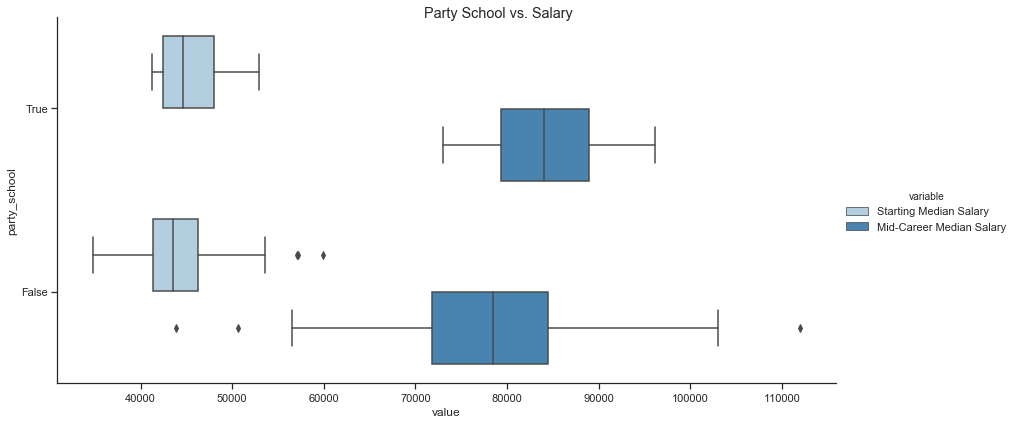

In [185]:
fig10 = sns.catplot(data=party_not_party_melted, x="value", y="party_school", \
                 hue="variable", kind="box", aspect=2, height=6, palette=sns.color_palette("Blues", n_colors=2))
fig10.fig.suptitle('Party School vs. Salary')

From the data, it looks like both mid career median salary and staring Mid-Career Median Salary are higher for party schools than for non party schools. We run a t-test to see if there is any statistical basis for these observations

# T-test between Party and Non-Party Schools

### Starting Median Salary

In [180]:
stats.ttest_ind(party_schools['Starting Median Salary'], not_party_schools['Starting Median Salary'], \
               equal_var=False)

Ttest_indResult(statistic=1.7949941032293468, pvalue=0.08465520852891764)

### Mid-Career Median Salary

In [181]:
stats.ttest_ind(party_schools['Mid-Career Median Salary'], not_party_schools['Mid-Career Median Salary'], \
               equal_var=False)

Ttest_indResult(statistic=3.406605645545248, pvalue=0.001968278692849084)

For mid career median salary, it does seem that going to a party school allows for higher salary. However for starting median salary. The pvalue is greater than 0.05 so there is no conclusive evidence to say going to a party school increases starting median salary.

More data would be valuable here as there aren’t a whole lot of observations for state-party schools.



# Top 20 Schools by Type

## What are the top 20 schools by Mid-Career Median Salary?

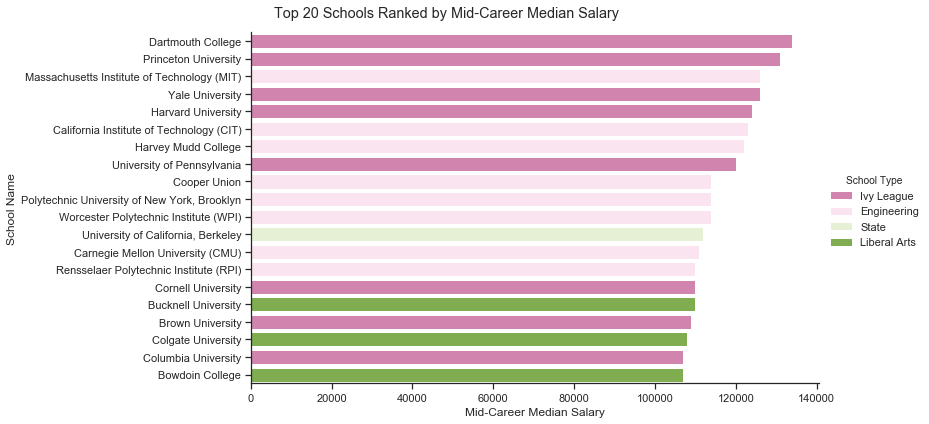

In [247]:
top20_midcareer_salary = salaries_by_college_type.iloc[:, [0,1,3]].sort_values(by='Mid-Career Median Salary', ascending=False)

top20_midcareer_salary = top20_midcareer_salary[:20]

plot11 = sns.catplot(data=top20_midcareer_salary, x="Mid-Career Median Salary", y="School Name", hue="School Type", \
            kind="bar", aspect=2, dodge=False, height=6, \
            palette="PiYG")

plt.subplots_adjust(top=0.92)
plot11.fig.suptitle('Top 20 Schools Ranked by Mid-Career Median Salary')

for p in plot11.ax.patches:
    width = p.get_width()

Ivy Leagues and Engineering schools round out the top of the 20 with only one state school, University of California Berkeley making the list. Bucknell, Colgate, and Bowdoin are the only liberal arts schools that make the top 20.

# Salaries by Region

## The third dataset is the salaries by college region data set. The first thing is to plot the distribution of the data set.

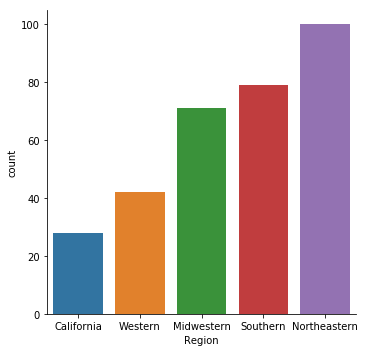

In [562]:
sns.catplot(data=salaries_by_region, x="Region", kind="count")

It's very interesting that California is it's own region. If we take the economy of california and compare to the the rest of the world, it would have the 5th biggest economy according to Fortune. So it's a good move to separate it out into it's own region.

# Differences in starting or mid-career salary by region

In [219]:
salaries_by_region_melted = pd.melt(frame=salaries_by_region.iloc[:, 0:4], id_vars='Region', \
        value_vars=['Starting Median Salary', 'Mid-Career Median Salary'])
salaries_by_region_melted['value'] = salaries_by_region_melted['value'].astype(float)

Text(0.5, 0.98, 'School Regions vs Salary')

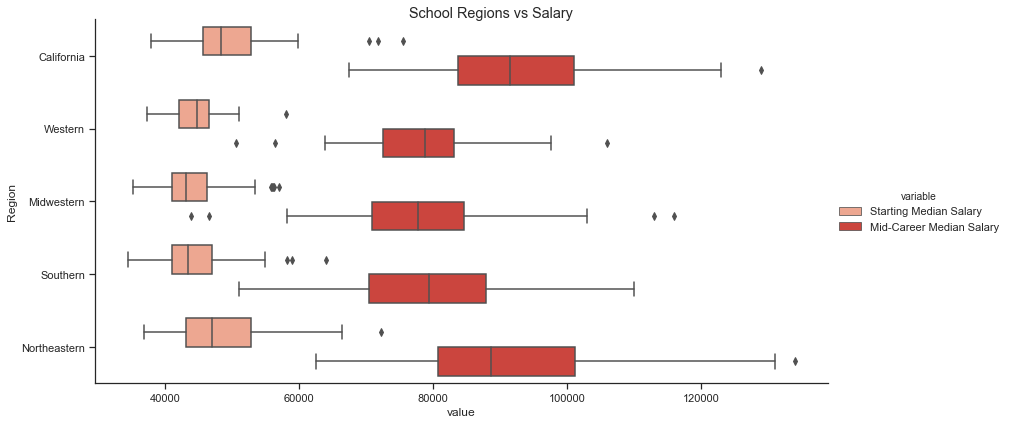

In [234]:
fig12 = sns.catplot(data=salaries_by_region_melted, x="value", y="Region", kind="box", \
            hue="variable", aspect=2, height=6, \
            palette='Reds')


plt.subplots_adjust(top=0.95)
fig12.fig.suptitle('School Regions vs Salary')

Both California and the Northeastern region have the highest starting and mid-career median salaries. All of the Ivy Leagues are in the Northeastern region so this could be a major proponent of why salaries are so high.

# Top 20 Schools by Region

### What region are the top schools clustered in?

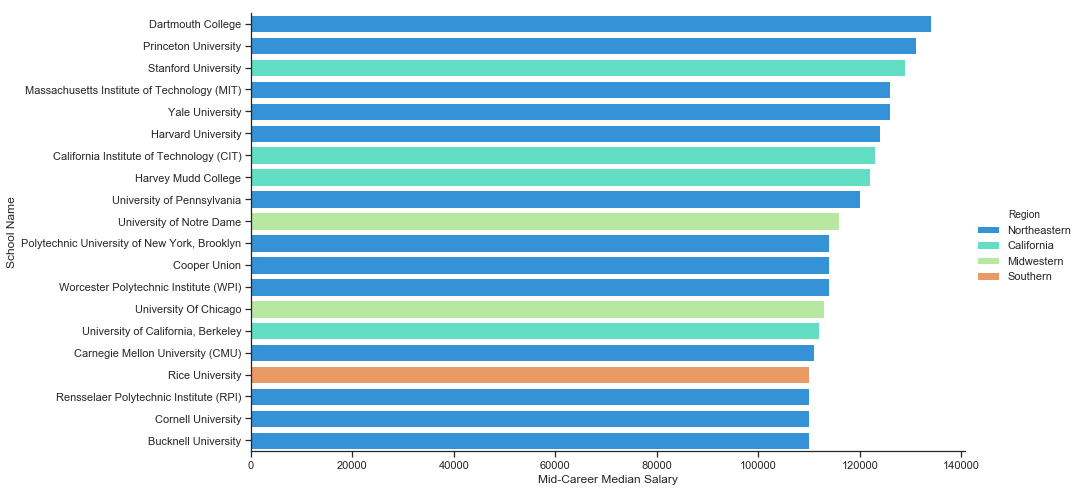

In [257]:
top20_by_region = salaries_by_region.iloc[:, [0,1,3]].sort_values(by='Mid-Career Median Salary', ascending=False)[:20]
sns.catplot(data=top20_by_region, x="Mid-Career Median Salary", y="School Name", hue="Region", kind="bar", \
            aspect=2, height=7, dodge=False, palette="rainbow")

#TODO: change the color schemes, add a title, and add salaries to the bars of each college

As a resident of California, I am proud to say that there are 4 California schools in the top 20. All of the 8 ivies make this list and we have 2 midwestern schools and one southern school, Rice!

# Type and Region

### What is the distribution of type of college and region? Which region contains the most engineering schools? Which region contains the most party schools?

I combine the salaries_by_region and salaries_by_college_type datasets to figure out the distribution of college types in certain regions.

In [238]:
by_region_trimmed = salaries_by_region.iloc[:, 0:2]
by_schooltype_trimmed = salaries_by_college_type.iloc[:, 0:4]
type_and_region_with_salaries = pd.merge(by_schooltype_trimmed, by_region_trimmed, how='left', on=['School Name'])

Text(0.5, 0.98, 'Distribution of Schools by Region')

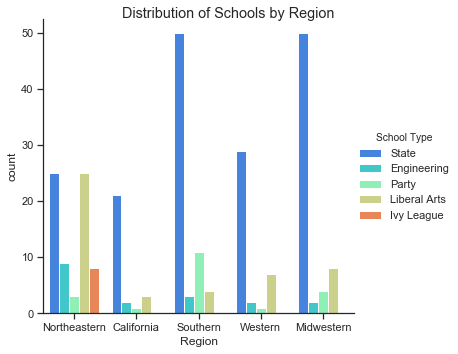

In [256]:
fig12 = sns.catplot(data=type_and_region_with_salaries, x="Region", kind="count", hue="School Type", dodge=True, 
           hue_order=['State', 'Engineering', 'Party', 'Liberal Arts', 'Ivy League'], \
           palette="rainbow")

fig12.fig.suptitle('Distribution of Schools by Region')

The Southern Region has the most party schools by far. It's also tied with the Midwest in terms of the number of state schools. 

### How does starting and mid career salary differ over region and type?

In [259]:
type_and_region_with_salaries_melted = pd.melt(frame=type_and_region_with_salaries, id_vars=['School Type', 'Region'], \
        value_vars=['Starting Median Salary', 'Mid-Career Median Salary'])
type_and_region_with_salaries_melted['value'] = type_and_region_with_salaries_melted['value'].astype(float)

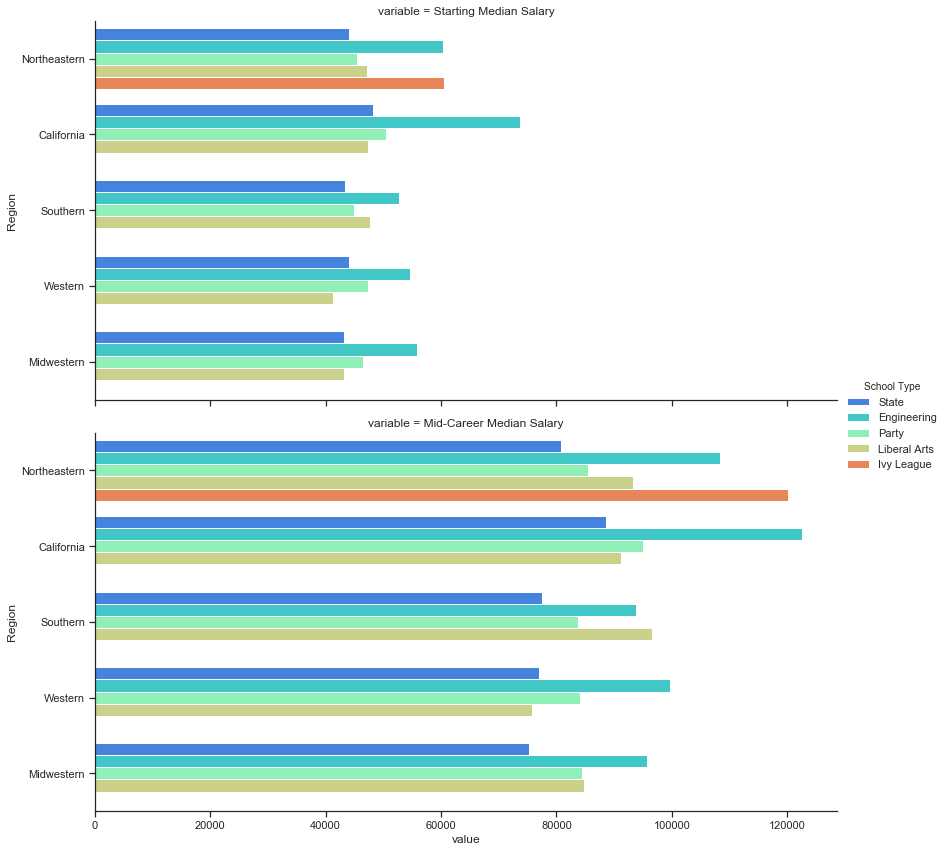

In [265]:
sns.catplot(data=type_and_region_with_salaries_melted, x="value", y="Region", \
            row="variable", hue="School Type", kind="bar", aspect=2, height =6, palette='rainbow', \
            hue_order=['State', 'Engineering', 'Party', 'Liberal Arts', 'Ivy League'], ci=0)

Looking at starting median salaries, engineering degrees dominate regardless of region. Even among mid-career median salaries, enginerring is a solid choice only surpassed by Ivy Leagues int he Northeast and Liberal Arts schools in the South. 

# Reflections

#### Major
1. If you want the highest starting salary, look into studying Engineering or becoming a Physician's Assistant. However, the growth potential of being a P.A is extremeley so be prepared.
2. Engineering is a solid choice for mid-career salary potential
3. If you want high potential growth in salary between start and mid career, consider Math or Philosophy
4. Careers with the highest earning potential (90th percentile), think about studying economics or finance

#### College Type
1. Most colleges are state schools
2. Ivy leagues and Engineering schools have the best mid career salary potential. But if you get a chance to go to UC Berkeley and not other Ivy Leagues, definitely go for it.
3. Go to a state school that is also a party school for potential higher median salary.

#### Region
1. Go to a school in California or the Northeast.
2. Go to an engineering school in California. 
3. If you must study liberal arts, going to a school in the South is better. 